# <h1 align='center' >Advanced Computer Vision</h1>
<h2 align='center' >Assignment # 03</h2>
<h3 align='left' >Muhammad Farooq Khan</h3>
<h3 align='left' >Roll No: 201616</h3>
<h3 align='left' >Submitted to: Dr. Habib Mahmood</h3>
<h4>Date: 22-11-2021</h4>

# Description

In [1]:
#importing all the libraries to be used in this assignnment
import math
import random
import warnings
import numpy as np
from numpy import dot
import matplotlib.cbook
from scipy.linalg import svd
from numpy import linalg as LA
np.set_printoptions(suppress=True)
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## Step 1:
### Define camera 1 with the following parameters and set the world coordinate system to the coordinate system of camera 1

In [2]:
au1,av1,u01,v01,ax1,by1,cz1,tx1,ty1,tz1 = 100,120,128,128,0,0,0,0,0,0    

## Step 2:
### Define camera 2 with respect to camera 1 with the given parameters

In [3]:
au2,av2,u02,v02,ax2,by2,cz2,tx2,ty2,tz2 = 90,110,128,128,0.1,(math.pi)/4,0.2,-1000,190,230

## Step 3:
### Get the intrinsic transformation matrices of both cameras, and the rotation and translation between both cameras

In [4]:
phix1,phiy1,phiz1 = ax1,by1,cz1

RotxRoty_1 = [[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0]]    
intrinsics1 = [[au1, 0,  u01],    #intrinsic matrix
              [0,  av1, v01],
              [0,  0,  1]]

intrinsics1 = np.array(intrinsics1).reshape((3,3))
    
rotx1 = [[1, 0, 0],
         [0, math.cos(phix1), -math.sin(phix1)],
         [0, math.sin(phix1), math.cos(phix1)]]
roty1 = [[math.cos(phiy1), 0, math.sin(phiy1)],
         [0, 1, 0],
         [-math.sin(phiy1),0,  math.cos(phiy1)]]
rotz1 = [[1, 0, 0],
          [0, math.cos(phiz1), -math.sin(phiz1)],
          [0, math.sin(phiz1), math.cos(phiz1)]]

RotxRoty_1 = np.dot(rotx1,roty1)
rotation1 = np.dot(RotxRoty_1,rotz1)   #rotation matrix
translation1 = np.array([tx1,ty1,tz1])        #translation matrix
antisymmetric1 = np.array([[0, -translation1[2], translation1[1]],
                           [translation1[2], 0, -translation1[0]],
                           [-translation1[1], translation1[0], 0]]).reshape(3,3)
translation1 = translation1.reshape(3,1)
print("Intrinsic Transformation Matrix of Camera 1")
print(intrinsics1)
print("")
print("Rotation Matrix of Camera 1")
print(rotation1)
print(" ")
print("Translation Matrix of Camera 1")
print(translation1)
print(" ")

phix2,phiy2,phiz2 = ax2,by2,cz2

RotxRoty_2 = [[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0]]    
intrinsics2 = [[au2, 0,  u02],    #camera 2 intrinsics
               [0,  av2, v02],
               [0,  0,  1]]

intrinsics2 = np.array(intrinsics2).reshape((3,3))
    
rotx2 = [[1, 0, 0],
         [0, math.cos(phix2), -math.sin(phix2)],
         [0, math.sin(phix2), math.cos(phix2)]]
roty2 = [[math.cos(phiy2), 0, math.sin(phiy2)],
         [0, 1, 0],
         [-math.sin(phiy2),0,  math.cos(phiy2)]]
rotz2 = [[1, 0, 0],
         [0, math.cos(phiz2), -math.sin(phiz2)],
         [0, math.sin(phiz2), math.cos(phiz2)]]

RotxRoty_2 = np.dot(rotx2,roty2)   
rotation2 = np.dot(RotxRoty_2,rotz2)    #rotation matrix 
translation2 = np.array([tx2,ty2,tz2])    #translation matrix
antisymmetric2 = np.array([[0, -translation2[2], translation2[1]],
                           [translation2[2], 0, -translation2[0]],
                           [-translation2[1], translation2[0], 0]]).reshape(3,3)
translation2 = translation2.reshape(3,1)
print("")
print("<------------------------------------------------------->")
print("")
print("Intrinsic Transformation Matrix of Camera 2")
print(intrinsics2)
print("")
print("Rotation Matrix of Camera 2")
print(rotation2)
print(" ")
print("Translation Matrix of Camera 2")
print(translation2)
print(" ")

Intrinsic Transformation Matrix of Camera 1
[[100   0 128]
 [  0 120 128]
 [  0   0   1]]

Rotation Matrix of Camera 1
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 
Translation Matrix of Camera 1
[[0]
 [0]
 [0]]
 

<------------------------------------------------------->

Intrinsic Transformation Matrix of Camera 2
[[ 90   0 128]
 [  0 110 128]
 [  0   0   1]]

Rotation Matrix of Camera 2
[[ 0.70710678  0.14048043  0.69301172]
 [ 0.07059289  0.96114569 -0.26686254]
 [-0.70357419  0.23762201  0.66971571]]
 
Translation Matrix of Camera 2
[[-1000]
 [  190]
 [  230]]
 


## Step 4:
### Get the Fundamental matrix analytically as the product of matrices defined in step 3.

In [5]:
Adashinverse = np.linalg.inv(intrinsics1)
Ainverse = np.linalg.inv(intrinsics2)
ptr1 = np.dot(np.transpose(Ainverse),np.transpose(rotation2))
ptr2 = np.dot(ptr1,antisymmetric2) 
fundamental = np.dot(ptr2,Adashinverse)
print("Fundamental matrix analytically as the product of matrices defined in step 3")
print(fundamental)

Fundamental matrix analytically as the product of matrices defined in step 3
[[  0.01665727   0.050087    -6.266121  ]
 [  0.0159923   -0.02044943   9.55084872]
 [ -6.06538939 -10.70284578 570.18603619]]


## Step 5:
### Define the given set of object points with respect to the world coordinate system (or camera 1 coordinate system).

In [6]:
object_points = np.array([[100, -400, 2000, 1], [300, -400, 3000, 1], [500, -400, 4000, 1], [700, -400, 2000, 1],
                         [900, -400,3000, 1], [100, -50, 4000, 1], [300, -50, 2000, 1], [500, -50, 3000, 1],
                         [700, -50, 4000, 1], [900, -50, 2000, 1], [100, 50, 3000, 1], [300, 50, 4000, 1],
                         [500, 50, 2000, 1], [700, 50, 3000, 1], [900, 50, 4000, 1], [100, 400, 2000, 1],
                         [300, 400, 3000, 1], [500, 400, 4000, 1], [700, 400, 2000, 1], [900, 400, 3000, 1]])
print("Object points with respect to the world coordinate system")
print(object_points)

Object points with respect to the world coordinate system
[[ 100 -400 2000    1]
 [ 300 -400 3000    1]
 [ 500 -400 4000    1]
 [ 700 -400 2000    1]
 [ 900 -400 3000    1]
 [ 100  -50 4000    1]
 [ 300  -50 2000    1]
 [ 500  -50 3000    1]
 [ 700  -50 4000    1]
 [ 900  -50 2000    1]
 [ 100   50 3000    1]
 [ 300   50 4000    1]
 [ 500   50 2000    1]
 [ 700   50 3000    1]
 [ 900   50 4000    1]
 [ 100  400 2000    1]
 [ 300  400 3000    1]
 [ 500  400 4000    1]
 [ 700  400 2000    1]
 [ 900  400 3000    1]]


## Step 6:
### Compute the couples of image points in both image planes by using the matrices of step 3.

In [7]:
extrinsics1 = np.array(([1,0,0,0],
                        [0,1,0,0],
                        [0,0,1,0])).reshape(3,4)
extrinsics4x4_1 = np.vstack((extrinsics1,[0,0,0,1]))
intrinsics3x4_1 = np.hstack((intrinsics1,np.array([0,0,0]).reshape(3,1)))
TFM1 = np.dot(intrinsics3x4_1,extrinsics4x4_1) 

RotxTrans =  np.dot(np.transpose(rotation2),translation2).reshape(3,1)
RotxTrans = -1 * RotxTrans
extrinsics2 = np.hstack((np.transpose(rotation2),RotxTrans))
extrinsics4x4_2 = np.vstack((extrinsics2,[0,0,0,1]))
intrinsics3x4_2 = np.hstack((intrinsics2,np.array([0,0,0]).reshape(3,1)))
TFM2 = np.dot(intrinsics3x4_2,extrinsics4x4_2) 
TFM2 = TFM2/TFM2[2][3]

Cam1_pixels = np.zeros((20,3))
for i in range(0,20):
    ptr3 = np.dot(TFM1,object_points[i]).reshape(1,3) 
    ptr3[0][0] = ptr3[0][0]/ptr3[0][2]
    ptr3[0][1] = ptr3[0][1]/ptr3[0][2]
    ptr3[0][2] = 1 
    Cam1_pixels[i] = ptr3
print("3D points projection onto image plane 1 in pixels.")
print(Cam1_pixels)
print("")
print("<------------------------------------------------------->")
print("")
cam2_pixels = np.zeros((20,3))
for i in range(0,20):
    ptr3 = np.dot(TFM2,object_points[i]).reshape(1,3) 
    ptr3[0][0] = ptr3[0][0]/ptr3[0][2]
    ptr3[0][1] = ptr3[0][1]/ptr3[0][2]
    ptr3[0][2] = 1 
    cam2_pixels[i] = ptr3
print("3D points projection onto image plane 2 in pixels.")
print(cam2_pixels)

3D points projection onto image plane 1 in pixels.
[[133. 104.   1.]
 [138. 112.   1.]
 [140. 116.   1.]
 [163. 104.   1.]
 [158. 112.   1.]
 [130. 126.   1.]
 [143. 125.   1.]
 [144. 126.   1.]
 [145. 126.   1.]
 [173. 125.   1.]
 [131. 130.   1.]
 [135. 129.   1.]
 [153. 131.   1.]
 [151. 130.   1.]
 [150. 129.   1.]
 [133. 152.   1.]
 [138. 144.   1.]
 [140. 140.   1.]
 [163. 152.   1.]
 [158. 144.   1.]]

<------------------------------------------------------->

3D points projection onto image plane 2 in pixels.
[[106.23238608 128.42029246   1.        ]
 [ 94.90619278 138.33602676   1.        ]
 [ 88.4997585  143.94466318   1.        ]
 [124.96921153 132.02880967   1.        ]
 [110.50846904 139.83001654   1.        ]
 [ 77.1989255  154.90560163   1.        ]
 [113.64301081 147.05703164   1.        ]
 [100.46524923 151.72967658   1.        ]
 [ 92.94282946 154.39701857   1.        ]
 [130.84903007 147.58219665   1.        ]
 [ 87.96402792 156.1001594    1.        ]
 [ 82.69939976 

## Step 7: 
### Draw the 2D points obtained in step 6.

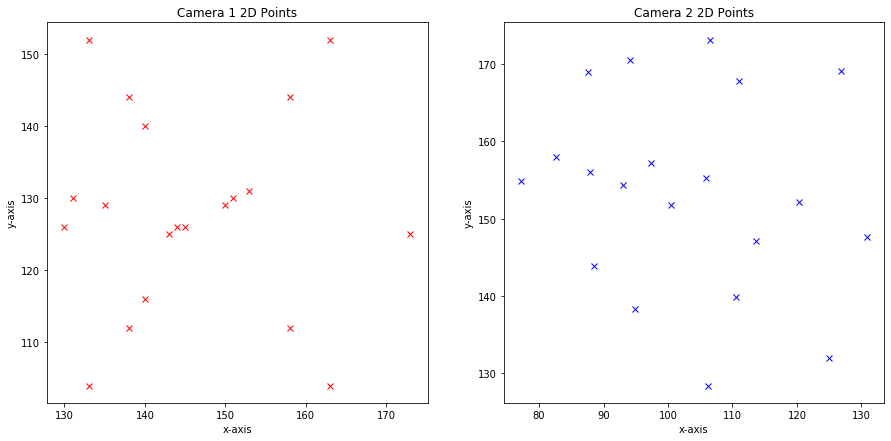

In [8]:
fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
for i in range(0,20):
    plt.plot(Cam1_pixels[i][0], Cam1_pixels[i][1],marker="x", color="red")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Camera 1 2D Points")

plt.subplot(1,2,2)
for i in range(0,20):
    plt.plot(cam2_pixels[i][0], cam2_pixels[i][1],marker="x", color="blue")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Camera 2 2D Points")
plt.show()


## Step 8:
### Compute the fundamental matrix by using the 8-point method and least-squares by means of the 2D points obtained in step 6.

In [9]:
FM = np.zeros((1,8))
ptr4 = []
for i in range(cam2_pixels.shape[0]):
    matrix_row = [(Cam1_pixels[i][0]*cam2_pixels[i][0]), (Cam1_pixels[i][0] * cam2_pixels[i][1]),
                  (Cam1_pixels[i][0]),(Cam1_pixels[i][1]*cam2_pixels[i][0]),
                  (Cam1_pixels[i][1] * cam2_pixels[i][1]), (Cam1_pixels[i][1]),
                  (cam2_pixels[i][0]) , cam2_pixels[i][1] ]
    FM = np.append(FM,np.array([matrix_row]),axis=0)
for i in range(0,20):
    ptr4.append(1)
    
FM = np.delete(FM,(0),axis=0)              
ptr4 = np.array(ptr4).reshape(20,1)
ptr5 = np.dot((np.transpose(FM)),FM)
ptr6 = -1 * np.array( np.linalg.inv(ptr5))
ptr7 = np.dot(ptr6,np.transpose(FM))
FM8pts = np.dot(ptr7,ptr4)
FM8pts = np.append(FM8pts,[[1]],axis=0)
FM8pts = FM8pts.reshape((3,3))
print("Fundamental matrix by using the 8-point method and least-squares by means of the 2D points obtained in step 6.")
print(FM8pts)

Fundamental matrix by using the 8-point method and least-squares by means of the 2D points obtained in step 6.
[[ 0.00002345  0.00002743 -0.00906974]
 [ 0.00005969 -0.00001897 -0.01408156]
 [-0.0077104   0.01002997  1.        ]]


## Step 9:
### Compare the step 8 matrix with the one obtained in step 4.

In [10]:
print("Fundamental Matrix obtained in step 4")
print(fundamental/fundamental[2][2])
print(" ")
print("Fundamental Matrix obtained in step 8")
print(FM8pts)

Fundamental Matrix obtained in step 4
[[ 0.00002921  0.00008784 -0.01098961]
 [ 0.00002805 -0.00003586  0.01675041]
 [-0.01063756 -0.0187708   1.        ]]
 
Fundamental Matrix obtained in step 8
[[ 0.00002345  0.00002743 -0.00906974]
 [ 0.00005969 -0.00001897 -0.01408156]
 [-0.0077104   0.01002997  1.        ]]


## Step 10:
### Draw in the windows of step 7 all the epipolar geometry, i.e. epipoles and epipolar lines by using the matrix obtained in step 8

In [11]:
def Epipolar_Geometry(planeptr1,FM8pts,Xrange,Yrange,option,planeptr2,title):
    for i in range(0,20):
        Font_size = 18
        pixelin2Dpts = planeptr1[i]
        if option == 1:
            ptr8 = np.dot(FM8pts,pixelin2Dpts)
        if option == 2:
            ptr8 = np.dot(pixelin2Dpts,FM8pts)
        u = -500
        v = -(ptr8[0]/ptr8[1])*u - (ptr8[2]/ptr8[1])
        u0 = u
        v0 = v
        u = 500
        v = -(ptr8[0]/ptr8[1])*u - (ptr8[2]/ptr8[1])
        uf = u
        vf = v
        ptr9 = [u0, v0]
        ptr10 = [uf, vf]
        xpoints = [ptr9[0], ptr10[0]]
        ypoints = [ptr9[1], ptr10[1]]
        plt.plot(planeptr2[i][0], planeptr2[i][1], marker = ".", markersize = 10, color = "RED")
        plt.plot(xpoints, ypoints)
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.title(str(title)+str(option),fontdict={'fontsize': Font_size})
    plt.xlim(Xrange)
    plt.ylim(Yrange)
    plt.show()

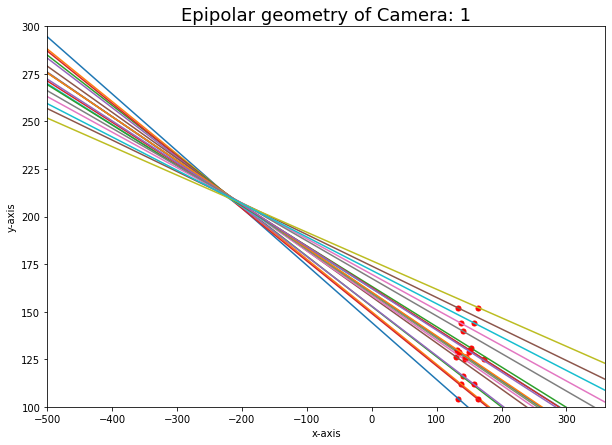

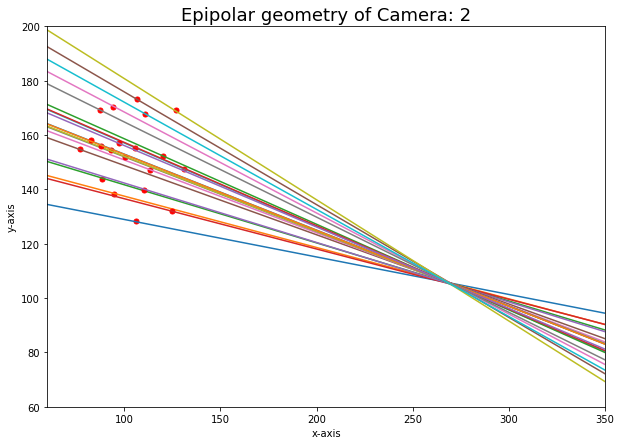

In [12]:
title = "Epipolar geometry of Camera: "    
option = 1
pltxlimit = [-500, 360]
pltylimit = [100, 300]
plt.figure(figsize = (10,7))
Epipolar_Geometry(cam2_pixels,FM8pts,pltxlimit,pltylimit,option,Cam1_pixels,title)

option = 2
pltxlimit = [60, 350]
pltylimit = [60, 200]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Cam1_pixels,FM8pts,pltxlimit,pltylimit,option,cam2_pixels,title)

## Step 11:
### Add some Gaussian noise to the 2D points producing discrepancies between the range [-1,+1] pixels for the 95% of points.

In [13]:
def Noise_Addition(NumberOfPts,pointsin2D,option):
    ptr11 = round(0.95 * NumberOfPts)
    ptr12 = NumberOfPts - ptr11
    pointsin2Dnoisy = np.zeros((ptr11 + 1, 3))
    x, y = -2, 2
    for i in range (0, ptr11 + 1):
        if option == 1:         
            pointsin2Dnoisy[i][0] = pointsin2D[i][0]+(np.random.rand(1)*2-1)
            pointsin2Dnoisy[i][1] = pointsin2D[i][1]+(np.random.rand(1)*2-1)
            pointsin2Dnoisy[i][2] = 1
        if option == 2:  
            pointsin2Dnoisy[i][0] = pointsin2D[i][0]+((y - x)*np.random.rand() + x)
            pointsin2Dnoisy[i][1] = pointsin2D[i][1]+((y - x)*np.random.rand() + x)
            pointsin2Dnoisy[i][2] = 1
    
    if (ptr12)>0: 
        for i in range(1,ptr12 + 1):
            pointsin2Dnoisy[i+i] = pointsin2D[i+i]
    return pointsin2Dnoisy

In [14]:
NumberOfPts = 20
option = 1
Noisy_cam1_pixels = Noise_Addition(NumberOfPts,Cam1_pixels,option)  
Noisy_cam2_pixels = Noise_Addition(NumberOfPts,cam2_pixels,option) 
print("Noisy 2D points between the range [-1,+1] pixels for the 95% of points for camera 1")
print(Noisy_cam1_pixels)
print("")
print("<------------------------------------------------------->")
print("")
print("Noisy 2D points between the range [-1,+1] pixels for the 95% of points for camera 2")
print(Noisy_cam2_pixels)

Noisy 2D points between the range [-1,+1] pixels for the 95% of points for camera 1
[[133.31373935 103.00887759   1.        ]
 [138.62766993 112.02826116   1.        ]
 [140.         116.           1.        ]
 [163.08110172 104.42351613   1.        ]
 [157.68434033 111.52231125   1.        ]
 [129.53824002 125.25999705   1.        ]
 [142.32008334 125.04932598   1.        ]
 [144.15323156 126.32552342   1.        ]
 [145.54442919 125.25298158   1.        ]
 [173.69217556 125.41488946   1.        ]
 [131.18656994 130.85775926   1.        ]
 [134.18810594 129.93698775   1.        ]
 [152.39756347 131.99979079   1.        ]
 [151.65317866 129.32597074   1.        ]
 [149.5352639  128.40724216   1.        ]
 [133.11515143 152.07676356   1.        ]
 [137.41440301 144.0323542    1.        ]
 [139.04556293 140.31473607   1.        ]
 [162.73411823 151.08377109   1.        ]
 [158.46306235 143.85674467   1.        ]]

<------------------------------------------------------->

Noisy 2D points

## Step 12:
### Again repeat step 8 up to 10 with the noisy 2D points.

In [15]:
FM1noise = np.zeros((1,8))
ptr4 = []
for i in range(cam2_pixels.shape[0]):
    ptr13 = [(Noisy_cam1_pixels[i][0]*Noisy_cam2_pixels[i][0]), (Noisy_cam1_pixels[i][0] * Noisy_cam2_pixels[i][1]),
                  (Noisy_cam1_pixels[i][0]),(Noisy_cam1_pixels[i][1]*Noisy_cam2_pixels[i][0]),
                  (Noisy_cam1_pixels[i][1] * Noisy_cam2_pixels[i][1]),
                  (Noisy_cam1_pixels[i][1]), (Noisy_cam2_pixels[i][0]) , Noisy_cam2_pixels[i][1] ]
    FM1noise = np.append(FM1noise,np.array([ptr13]),axis=0)
for i in range(0,20):
    ptr4.append(1)
FM1noise = np.delete(FM1noise,(0),axis=0)              
ptr4 = np.array(ptr4).reshape(20,1)
ptr14 = np.dot((np.transpose(FM1noise)),FM1noise)
ptr6 = -1 * np.array( np.linalg.inv(ptr14))
ptr7 = np.dot(ptr6,np.transpose(FM1noise))
FM8ptsNoise = np.dot(ptr7,ptr4)
FM8ptsNoise = np.append(FM8ptsNoise,[[1]],axis=0)
FM8ptsNoise = FM8ptsNoise.reshape((3,3))
print("Fundamental Matrix obtained using 8 points method and noisy 2D points between the range [-1,+1]")
print(FM8ptsNoise)

Fundamental Matrix obtained using 8 points method and noisy 2D points between the range [-1,+1]
[[ 0.0000193   0.00002835 -0.00678869]
 [ 0.00000079  0.00000672 -0.00295548]
 [-0.00240288 -0.00296013  1.        ]]


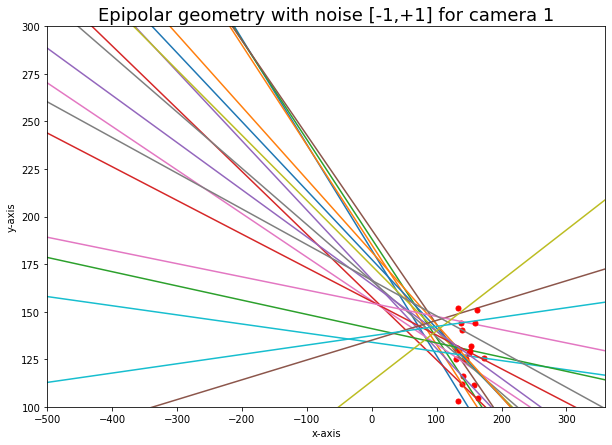

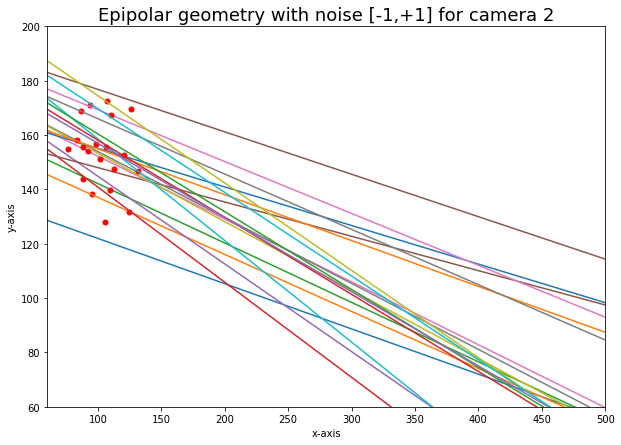

In [16]:
title = "Epipolar geometry with noise [-1,+1] for camera " 
option = 1
pltxlimit = [-500, 360]
pltylimit = [100, 300]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam2_pixels,FM8ptsNoise,pltxlimit,pltylimit,option,Noisy_cam1_pixels,title)

option=2
pltxlimit = [60, 500]
pltylimit = [60, 200]
plt.figure(figsize=(10,7))
Epipolar_Geometry(Noisy_cam1_pixels,FM8ptsNoise,pltxlimit,pltylimit,option,Noisy_cam2_pixels,title)

### Use the SVD function

In [17]:
U, s, VT = svd(FM8ptsNoise)
ptr15 = np.diag(s)
ptr15[2][2] = 0 
FM_SVD = U.dot(ptr15.dot(VT))
print("Original Fundamental Matrix Rank =",np.linalg.matrix_rank(fundamental))
print("Fundamental Matrix Rank [-1 1] noise added =",np.linalg.matrix_rank(FM8ptsNoise))
print("Fundamental Matrix Rank with SVD =",np.linalg.matrix_rank(FM_SVD))

Original Fundamental Matrix Rank = 2
Fundamental Matrix Rank [-1 1] noise added = 3
Fundamental Matrix Rank with SVD = 2


In [18]:
print("Fundamental matrix obtained after SVD")
print(FM_SVD)
print("")
print("Fundamental Matrix obtained with 8 Points method")
print(FM8pts)

Fundamental matrix obtained after SVD
[[ 0.0000213   0.00002688 -0.00678869]
 [ 0.00000392  0.00000442 -0.00295548]
 [-0.00240285 -0.00296014  1.        ]]

Fundamental Matrix obtained with 8 Points method
[[ 0.00002345  0.00002743 -0.00906974]
 [ 0.00005969 -0.00001897 -0.01408156]
 [-0.0077104   0.01002997  1.        ]]


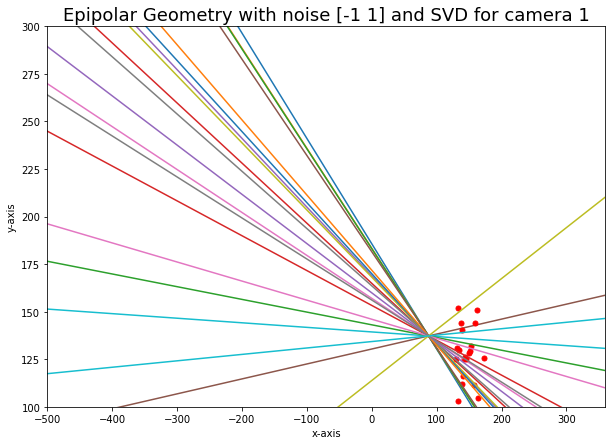

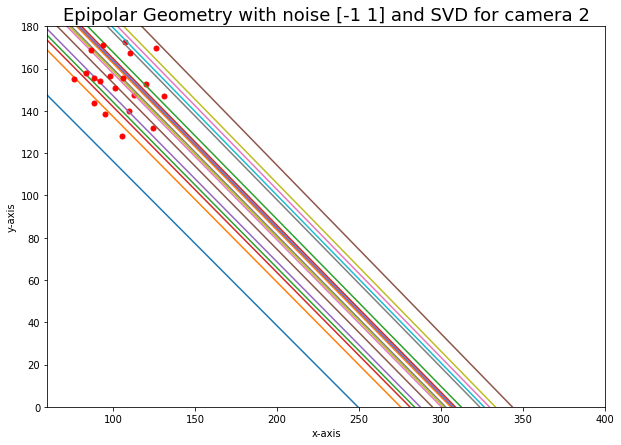

In [19]:
title = "Epipolar Geometry with noise [-1 1] and SVD for camera " 
option = 1
pltxlimit = [-500, 360]
pltylimit = [100, 300]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam2_pixels,FM_SVD,pltxlimit,pltylimit,option,Noisy_cam1_pixels,title)

option = 2
pltxlimit = [60, 400]
pltylimit = [0, 180]
plt.figure(figsize=(10,7))
Epipolar_Geometry(Noisy_cam1_pixels,FM_SVD,pltxlimit,pltylimit,option,Noisy_cam2_pixels,title)

## Step 13:
### Increase the Gaussian noise of step 11 (now in the range [-2,+2] for the 95% of points) and repeat step 8-12.

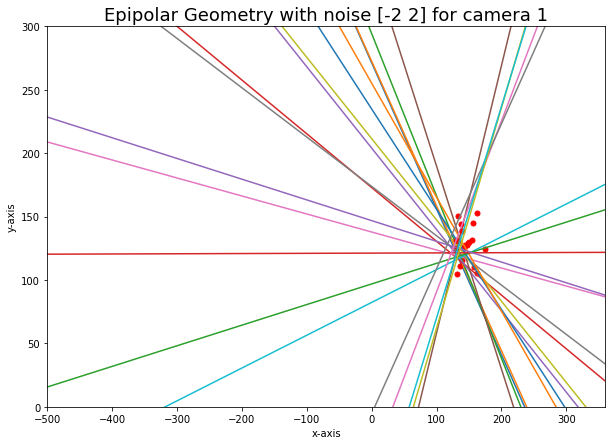

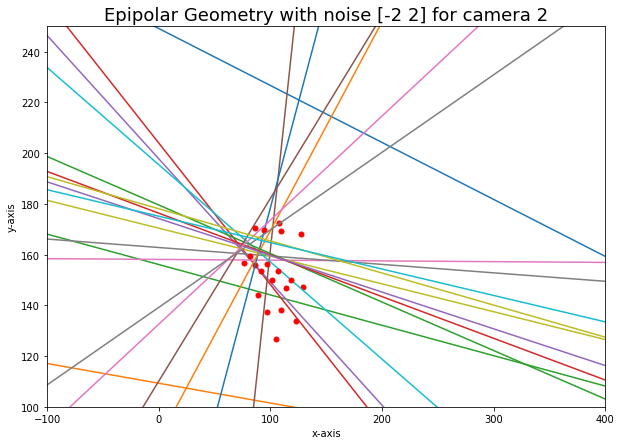

In [20]:
NumberOfPts = 20
option = 2  
Noisy_cam1_pixels_two = Noise_Addition(NumberOfPts,Cam1_pixels,option)  
Noisy_cam2_pixels_two = Noise_Addition(NumberOfPts,cam2_pixels,option) 
FMnoise2 = np.zeros((1,8))
ptr4 = []
for i in range(cam2_pixels.shape[0]):
    ptr13 = [(Noisy_cam1_pixels_two[i][0]*Noisy_cam2_pixels_two[i][0]),
             (Noisy_cam1_pixels_two[i][0] * Noisy_cam2_pixels_two[i][1]),
             (Noisy_cam1_pixels_two[i][0]),(Noisy_cam1_pixels_two[i][1]*Noisy_cam2_pixels_two[i][0]),
             (Noisy_cam1_pixels_two[i][1] * Noisy_cam2_pixels_two[i][1]),
             (Noisy_cam1_pixels_two[i][1]),(Noisy_cam2_pixels_two[i][0]), Noisy_cam2_pixels_two[i][1]]
    FMnoise2 = np.append(FMnoise2,np.array([ptr13]),axis=0)
for i in range(0,20):
    ptr4.append(1)
FMnoise2 = np.delete(FMnoise2,(0),axis=0)              
ptr4 = np.array(ptr4).reshape(20,1)
ptr14 = np.dot((np.transpose(FMnoise2)),FMnoise2)
ptr6 = -1 * np.array( np.linalg.inv(ptr14))
ptr7 = np.dot(ptr6,np.transpose(FMnoise2))
FM8pts2 = np.dot(ptr7,ptr4)
FM8pts2 = np.append(FM8pts2,[[1]],axis=0)
FM8pts2 =FM8pts2.reshape((3,3))

title="Epipolar Geometry with noise [-2 2] for camera " 
option=1
pltxlimit = [-500, 360]
pltylimit = [0, 300]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam2_pixels_two,FM8pts2,pltxlimit,pltylimit,option,Noisy_cam1_pixels_two,title)

option=2
pltxlimit = [-100, 400]
pltylimit = [100, 250]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam1_pixels_two,FM8pts2,pltxlimit,pltylimit,option,Noisy_cam2_pixels_two,title)

## Step 14:
### Compute the fundamental matrix by using the 8-point method and SVD from the points 2D obtained in step 6 and without noise. Compare the obtained matrix with the one obtained in step 8.

In [21]:
U, s, VT = svd(FM8pts2)
ptr15 = np.diag(s)
ptr15[2][2] = 0 
FM_SVD2 = U.dot(ptr15.dot(VT))
print("Fundamental matrix obtained after SVD")
print(FM_SVD2)
print("")
print("Fundamental Matrix obtained with 8 Points method")
print(FM8pts)

Fundamental matrix obtained after SVD
[[ 0.00001584  0.00002974 -0.00628197]
 [-0.00000625  0.00001013 -0.00137235]
 [-0.00147588 -0.00512481  1.        ]]

Fundamental Matrix obtained with 8 Points method
[[ 0.00002345  0.00002743 -0.00906974]
 [ 0.00005969 -0.00001897 -0.01408156]
 [-0.0077104   0.01002997  1.        ]]


## Step 15:
### Repeat step 10 up to 13 (with the matrix of step 14 instead of step 8) for some Gaussian noise first in the rang [-1, 1] and then in the range [-2, 2] for the 95% of points.

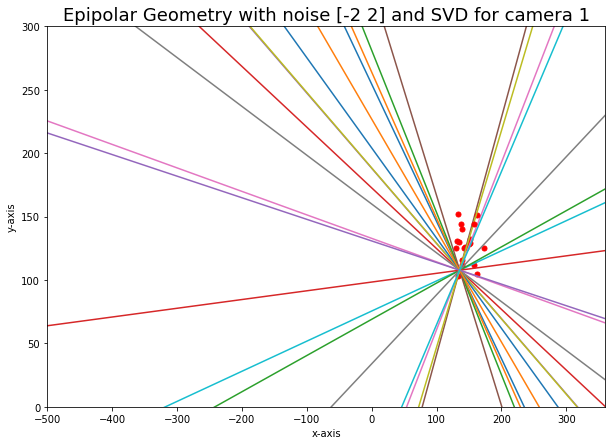

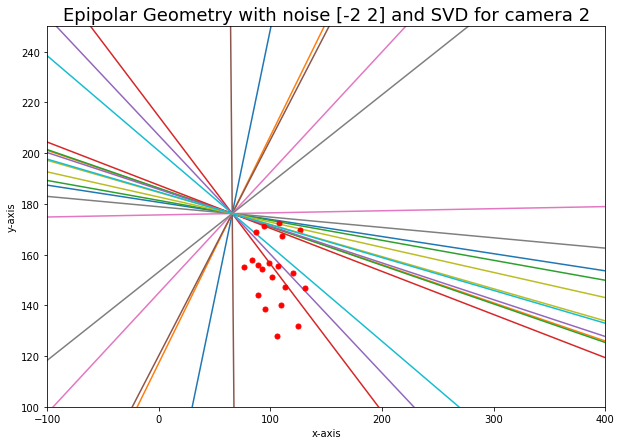

In [22]:
option = 1
pltxlimit = [-500, 360]
pltylimit = [0, 300]
plt.figure(figsize=(10,7))
title="Epipolar Geometry with noise [-2 2] and SVD for camera "
Epipolar_Geometry(Noisy_cam2_pixels,FM_SVD2,pltxlimit,pltylimit,option,Noisy_cam1_pixels,title)

option = 2
pltxlimit = [-100, 400]
pltylimit = [100, 250]
plt.figure(figsize=(10,7))
Epipolar_Geometry(Noisy_cam1_pixels,FM_SVD2,pltxlimit,pltylimit,option,Noisy_cam2_pixels,title)

In [23]:
FM = np.zeros((1,8))
ptr4 = []
for i in range(cam2_pixels.shape[0]):
    ptr13 = [(Cam1_pixels[i][0]*cam2_pixels[i][0]), (Cam1_pixels[i][0] * cam2_pixels[i][1]), (Cam1_pixels[i][0]),
                  (Cam1_pixels[i][1]*cam2_pixels[i][0]), (Cam1_pixels[i][1] * cam2_pixels[i][1]), (Cam1_pixels[i][1]),
                  (cam2_pixels[i][0]) , cam2_pixels[i][1] ]
    FM = np.append(FM,np.array([ptr13]),axis=0)
FM = np.delete(FM,(0),axis=0)              
U, s, VT = svd(FM)
min = np.amin(s)
indexofmin = np.where(s == min)[0]
F = VT[indexofmin]
F = np.append(F,1).reshape(3,3)
print("The fundamental matrix by using the 8-point method and SVD from the points 2D obtained in step 6")
print(F)

The fundamental matrix by using the 8-point method and SVD from the points 2D obtained in step 6
[[-0.00037515  0.00035488  0.09046189]
 [-0.00330548  0.00129654  0.61077203]
 [ 0.3292041  -0.71441302  1.        ]]


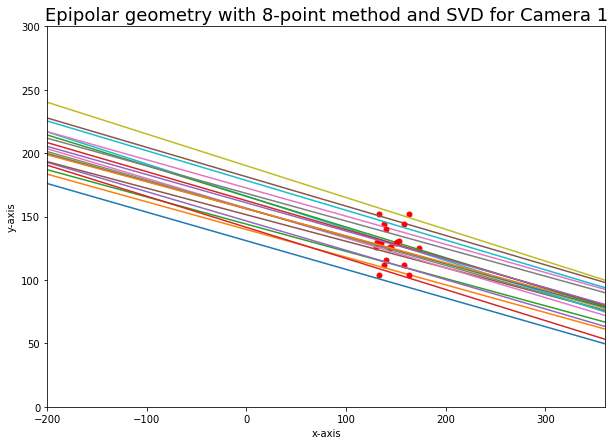

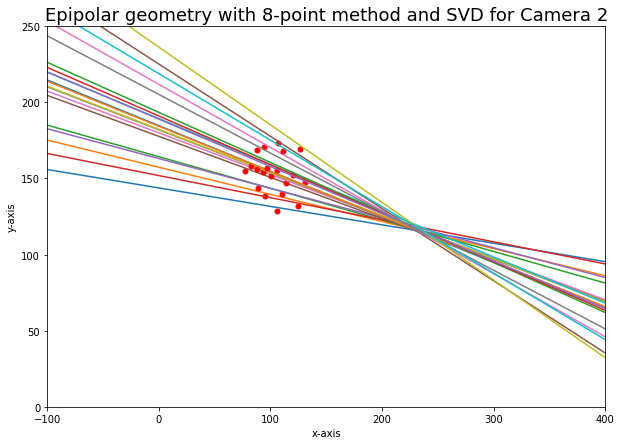

In [24]:
title="Epipolar geometry with 8-point method and SVD for Camera "    
option=1
pltxlimit = [-200, 360]
pltylimit = [0, 300]
plt.figure(figsize=(10,7))
Epipolar_Geometry(cam2_pixels,F,pltxlimit,pltylimit,option,Cam1_pixels,title)

option=2
pltxlimit = [-100, 400]
pltylimit = [0, 250]
plt.figure(figsize=(10,7))
Epipolar_Geometry(Cam1_pixels,F,pltxlimit,pltylimit,option,cam2_pixels,title)

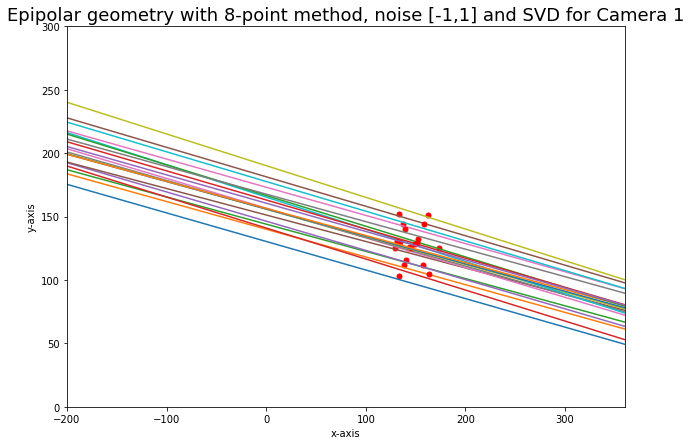

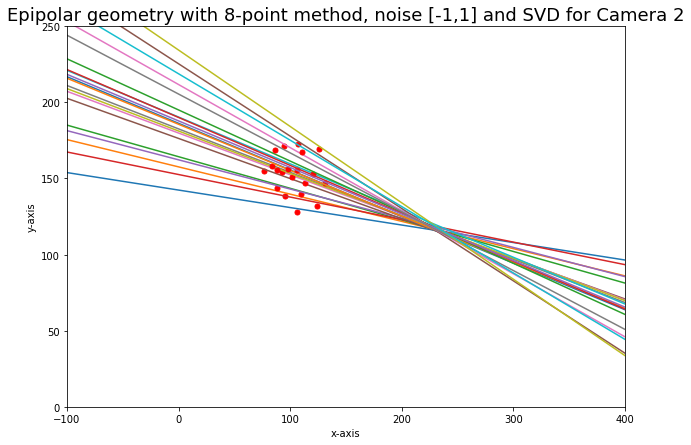

In [25]:
title = "Epipolar geometry with 8-point method, noise [-1,1] and SVD for Camera "    
option = 1
pltxlimit = [-200, 360]
pltylimit = [0, 300]
plt.figure(figsize=(10,7))
Epipolar_Geometry(Noisy_cam2_pixels,F,pltxlimit,pltylimit,option,Noisy_cam1_pixels,title)

option=2  ## 0 means shifted
pltxlimit = [-100, 400]
pltylimit = [0, 250]
plt.figure(figsize=(10,7))
Epipolar_Geometry(Noisy_cam1_pixels,F,pltxlimit,pltylimit,option,Noisy_cam2_pixels,title)


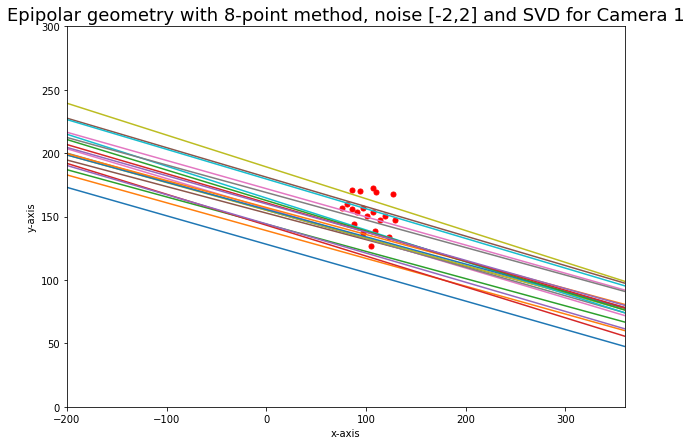

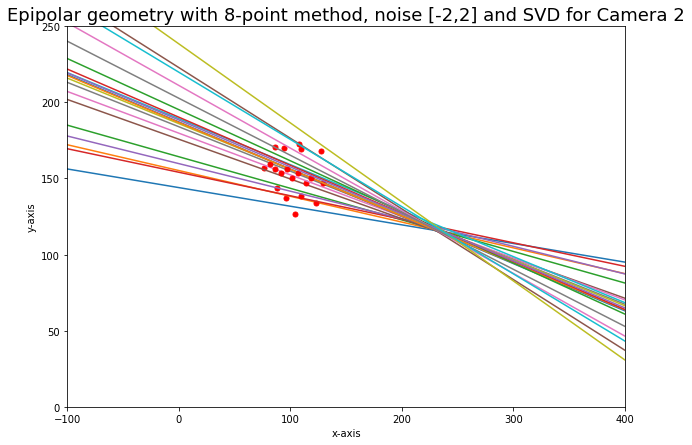

In [26]:
title = "Epipolar geometry with 8-point method, noise [-2,2] and SVD for Camera "    
option = 1
pltxlimit = [-200, 360]
pltylimit = [0, 300]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam2_pixels_two,F,pltxlimit,pltylimit,option,Noisy_cam2_pixels_two,title)

option=2
pltxlimit = [-100, 400]
pltylimit = [0, 250]
plt.figure(figsize=(10,7))
Epipolar_Geometry(Noisy_cam1_pixels_two,F,pltxlimit,pltylimit,option,Noisy_cam2_pixels_two,title)


## Step 16:
### Compare the epipolar geometry obtained in step 15 (using SVD) with the one obtained in steps 11 and 13 (using LS). Which of both fundamental matrices minimizes the distance between points and epipolar lines?

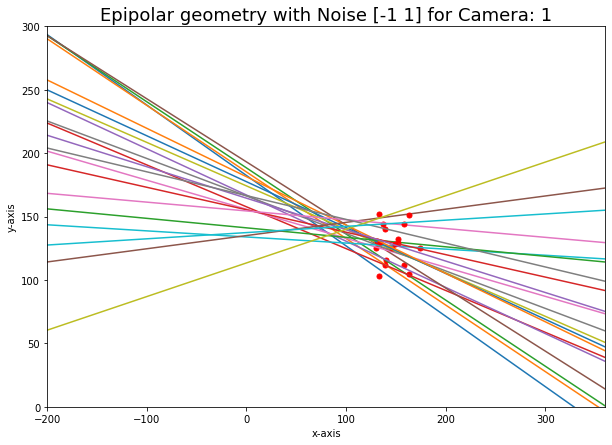

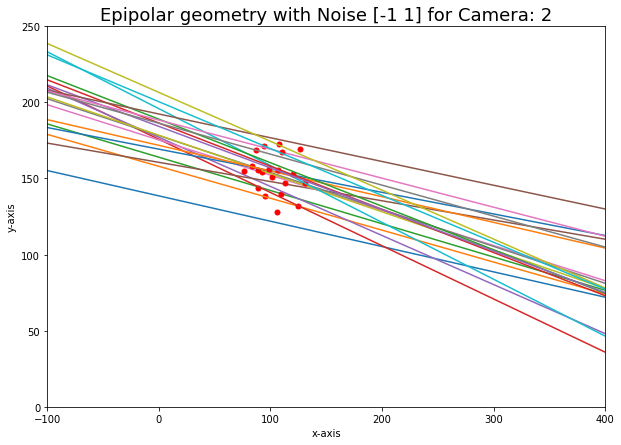

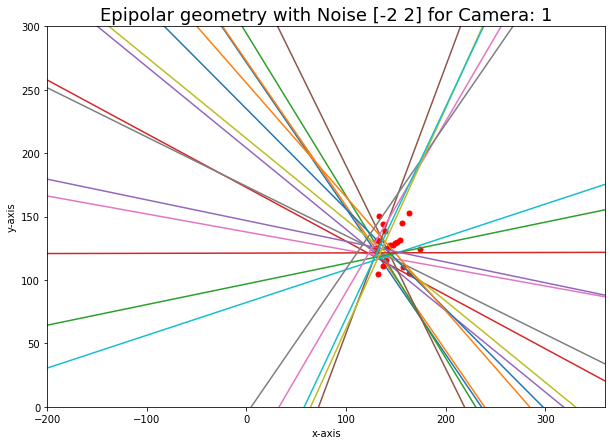

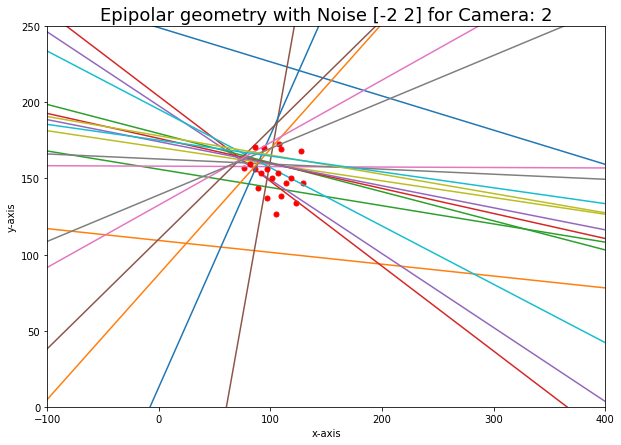

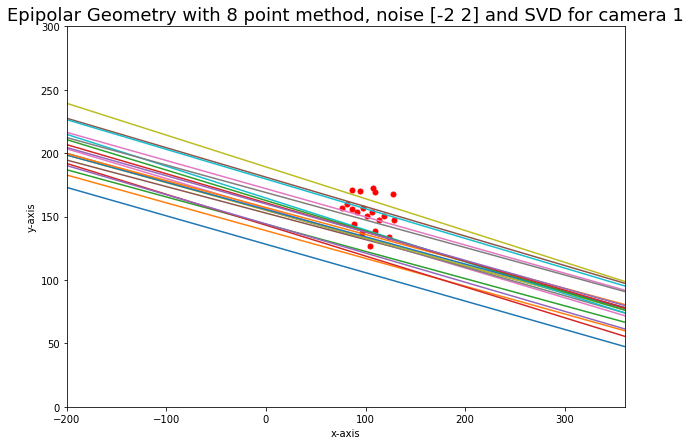

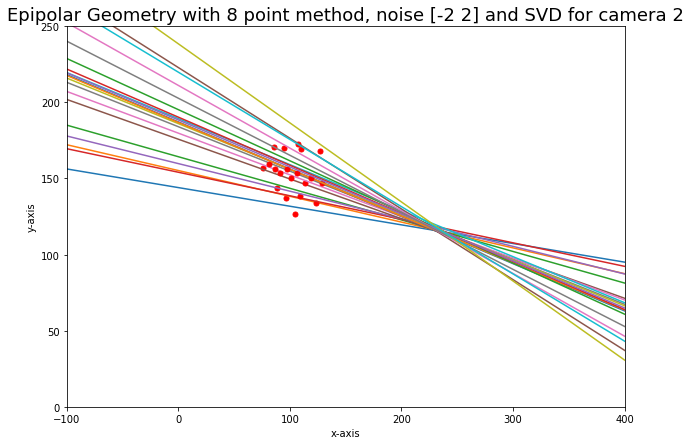

In [27]:
title = "Epipolar geometry with Noise [-1 1] for Camera: " 
option = 1 
pltxlimit = [-200, 360]
pltylimit = [0, 300]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam2_pixels,FM8ptsNoise,pltxlimit,pltylimit,option,Noisy_cam1_pixels,title)

option = 2
pltxlimit = [-100, 400]
pltylimit = [0, 250]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam1_pixels,FM8ptsNoise,pltxlimit,pltylimit,option,Noisy_cam2_pixels,title)

title = "Epipolar geometry with Noise [-2 2] for Camera: " 
option = 1
pltxlimit = [-200, 360]
pltylimit = [0, 300]
plt.figure(figsize=(10,7))
Epipolar_Geometry(Noisy_cam2_pixels_two,FM8pts2,pltxlimit,pltylimit,option,Noisy_cam1_pixels_two,title)

option = 2 
pltxlimit = [-100, 400]
pltylimit = [0, 250]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam1_pixels_two,FM8pts2,pltxlimit,pltylimit,option,Noisy_cam2_pixels_two,title)

title = "Epipolar Geometry with 8 point method, noise [-2 2] and SVD for camera "    
option = 1
pltxlimit = [-200, 360]
pltylimit = [0, 300]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam2_pixels_two,F,pltxlimit,pltylimit,option,Noisy_cam2_pixels_two,title)

option = 2
pltxlimit = [-100, 400]
pltylimit = [0, 250]
plt.figure(figsize = (10,7))
Epipolar_Geometry(Noisy_cam1_pixels_two,F,pltxlimit,pltylimit,option,Noisy_cam2_pixels_two,title)